In [133]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import math

In [134]:
# define variables
imageX = imageY = 256
radius = imageX/2
a0 = np.ones((imageX,imageY))
irow, icol = np.indices(a0.shape)
centX = irow - a0.shape[0] / 2.0
centY = icol - a0.shape[1] / 2.0
iradius = (centX**2 + centY**2)**0.5 #distance from centre
itheta = np.arctan2(centX, centY) #angle from centre

In [142]:
# polynomial functions in jacobi radial form

def scaleDataRange( data, **kwargs ):
    dmin = kwargs.get('dmin', 0)
    dmax = kwargs.get('dmax', 1)
    return ((data-np.min(data))/(np.max(data)-np.min(data)))*( dmax - dmin )

piston = a0 * 1 

tiltx = a0 * (iradius/radius)*np.cos(itheta)
tilty = a0 * (iradius/radius)*np.sin(itheta)

astigx = (a0 * (((iradius/radius)) * np.sin(2 * itheta )))
astigy = (a0 * (((iradius/radius)**2) * np.cos(2 * itheta )))
defocus = a0 * (2*(iradius/radius)**2 - 1)

comax = a0* (3*(iradius/radius)**3 - 2*(iradius/radius))*np.cos(itheta)
comay = a0* (3*(iradius/radius)**3 - 2*(iradius/radius))*np.sin(itheta)
trefoilx = a0 * ((iradius/radius)**3)*np.cos(3*itheta)
trefoily = a0 * ((iradius/radius)**3)*np.sin(3*itheta)

quadrafoilx = a0 *(iradius/radius)**4 *np.cos(4*itheta)  
quadrafoily = a0 *(iradius/radius)**4 *np.sin(4*itheta)
spherical = a0 *( 6*(iradius/radius)**4 - 6*(iradius/radius)**2 + 1 )
astig2x = a0* (4*(iradius/radius)**4 - 3*(iradius/radius)**2)*np.cos(2*itheta)
astig2y = a0* (4*(iradius/radius)**4 - 3*(iradius/radius)**2)*np.sin(2*itheta)

Aperture = a0
n = range(0, len(Aperture[0] ))
m = range(0, len(Aperture[1] ))
for i in n:
    for j in m:
        if iradius[i,j]/radius < 1:
            Aperture[i,j] = 1
        if iradius[i,j]/radius >= 1:
            Aperture[i,j] = 0

polynomials = np.array([piston, 
                        tiltx, tilty, 
                        astigx, astigy, defocus, 
                        comax, comay, trefoilx, trefoily,
                        spherical, astig2x, astig2y, quadrafoilx, quadrafoily
                       ])*Aperture

for n in range( len(polynomials) ):
    polynomials[n] = scaleDataRange(polynomials[n])

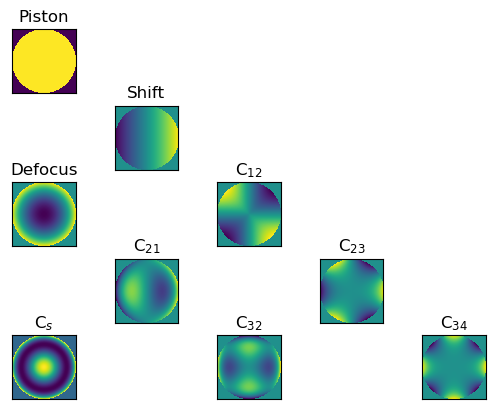

In [143]:
w = 5
h = 5
camp='viridis'

ax1 = plt.subplot2grid((w,h), (0, 0))
ax2 = plt.subplot2grid((w, h), (1, 1))

ax3 = plt.subplot2grid((w, h), (2, 0))
ax4 = plt.subplot2grid((w, h), (2, 2))

ax5 = plt.subplot2grid((w, h), (3, 1))
ax6 = plt.subplot2grid((w, h), (3, 3))

ax7 = plt.subplot2grid((w, h), (4, 0))
ax8 = plt.subplot2grid((w, h), (4, 2))
ax9 = plt.subplot2grid((w, h), (4, 4))


ax1.matshow( polynomials[0], cmap=camp )
ax2.matshow( polynomials[1], cmap=camp )
ax3.matshow( polynomials[5], cmap=camp )
ax4.matshow( polynomials[3], cmap=camp )
ax5.matshow( polynomials[6], cmap=camp )
ax6.matshow( polynomials[8], cmap=camp )
ax7.matshow( polynomials[10], cmap=camp )
ax8.matshow( polynomials[11], cmap=camp )
ax9.matshow( polynomials[13], cmap=camp )

a = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
title = ['Piston','Shift','Defocus','C$_{12}$','C$_{21}$','C$_{23}$','C$_{s}$','C$_{32}$','C$_{34}$']

n = 0
for ax in a:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title[n])
    n=n+1